Populating the interactive namespace from numpy and matplotlib


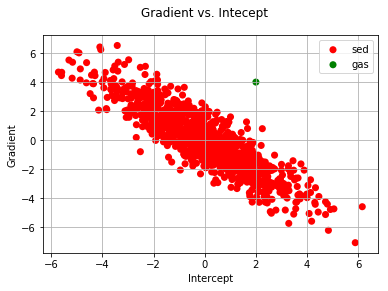

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

ns = 1000 
angs = np.array([12,24,36])
nangs = len(angs)
sinsq_angs = np.square(np.sin(angs/180*pi))
avo_I = np.random.normal(0,2,ns)
avo_G = -1*avo_I + np.random.normal(0,1,ns)
avo_I[0]=2
avo_G[0]=4

fig, ax = plt.subplots()
ax.scatter(avo_I[1:],avo_G[1:], c='red', s=50, label='sed',
               alpha=1, edgecolors='none')
ax.scatter(avo_I[0],avo_G[0], c='green', s=50, label='gas',
               alpha=1, edgecolors='none')
ax.legend()
ax.grid(True)
fig.suptitle('Gradient vs. Intecept')
plt.xlabel('Intercept')
plt.ylabel('Gradient')
fig.savefig('initial.jpg')

refl = np.outer(sinsq_angs, avo_G) + avo_I + np.random.normal(size=(nangs,ns), scale=1e-10)
near = refl[0,:]
mid = refl[1,:]
far = refl[2,:]

G=np.zeros(ns)
I=np.zeros(ns)
Q=np.zeros(ns)


True
True
[0.04322727 0.1654347  0.3454915 ]
[2.17290908 2.66173879 3.38196601]


LinregressResult(slope=3.999999999791889, intercept=1.9999999999887184, rvalue=1.0, pvalue=9.003163161571059e-11, stderr=0.0)

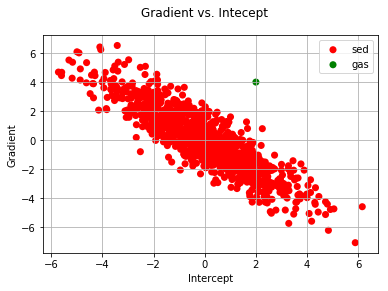

In [21]:
import scipy.stats as stats

def avo_IG(refls, angles, avo_I, avo_G, qual):
    ns = refls.shape[1]
    na = angles.shape[0]
    sangs = np.square(np.sin(angles/180*pi))
    for i in range(ns):
        avo_G[i], avo_I[i], q, p, err = stats.linregress(sangs, refls[:,i])
        qual[i] = q*q
    
        
G=np.zeros(ns)
I=np.zeros(ns)
Q=np.zeros(ns)
avo_IG(refl, angs,I,G,Q)
print(np.allclose(G,avo_G))
print(np.allclose(I,avo_I))
fig, ax = plt.subplots()
ax.scatter(I[1:],G[1:], c='red', s=50, label='sed',
               alpha=1, edgecolors='none')
ax.scatter(I[0],G[0], c='green', s=50, label='gas',
               alpha=1, edgecolors='none')
ax.legend()
ax.grid(True)
fig.suptitle('Gradient vs. Intecept')
plt.xlabel('Intercept')
plt.ylabel('Gradient')
fig.savefig('Fitted.jpg')

print(np.square(np.sin(angs/180*pi)))
print(refl[:,0])
stats.linregress(sinsq_angs,refl[:,0])

In [28]:

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

X = np.c_[I,G]
print(X)
X = StandardScaler().fit_transform(X)
db = DBSCAN(eps=0.8, min_samples=1).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
labels_true = np.zeros(ns)
labels_true[0] = 1
print(labels.shape)
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
#print("Adjusted Rand Index: %0.3f"
#      % metrics.adjusted_rand_score(labels_true, labels))
#print("Adjusted Mutual Information: %0.3f"
#      % metrics.adjusted_mutual_info_score(labels_true, labels))
#print("Silhouette Coefficient: %0.3f"
#      % metrics.silhouette_score(X, labels))


[[ 2.          4.        ]
 [-0.13016397  0.35965231]
 [ 1.06248452 -2.09304134]
 ...
 [ 0.23993076 -0.89105299]
 [-1.95564348  0.68721835]
 [ 1.1570118  -0.38300966]]
(1000,)
Estimated number of clusters: 2


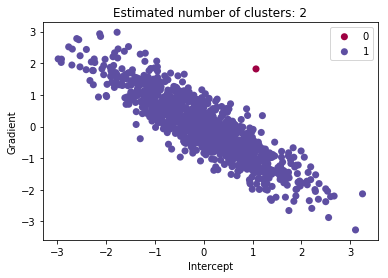

In [31]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
fig, ax = plt.subplots()
for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    ax.scatter(xy[:, 0], xy[:, 1], c=col, s=50, label=k,alpha=1, edgecolors='none')
ax.legend()

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.xlabel('Intercept')
plt.ylabel('Gradient')
plt.show()

In [45]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, init='random')   
km.fit(X)  #df is the dataframe which contains points as coordinates
labels = km.labels_

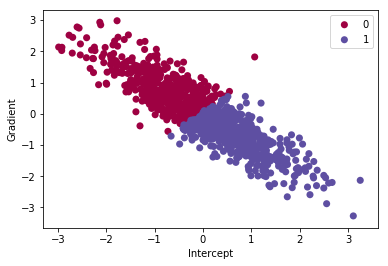

In [46]:
# Setting various plot properties
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
fig, ax = plt.subplots()
for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    ax.scatter(xy[:, 0], xy[:, 1], c=col, s=50, label=k,alpha=1, edgecolors='none')
ax.legend()

#plt.title('Estimated number of clusters: %d' % n_clusters)
plt.xlabel('Intercept')
plt.ylabel('Gradient')
plt.show()